# Bank Customer Churn Prediction

In [44]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [45]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [46]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [47]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [49]:
df.shape

(10000, 12)

In [50]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [51]:
df.drop('customer_id',axis=1,inplace=True)

Text(0.5, 1.0, 'churn in each country')

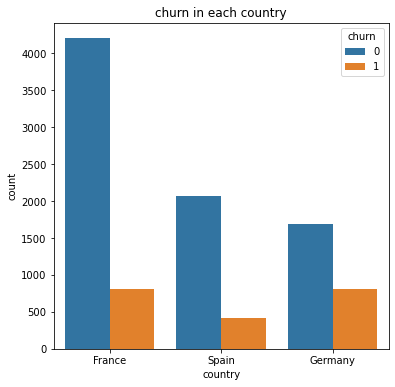

In [52]:
plt.figure(figsize=(6,6))
sns.countplot(df.country,hue= df.churn)
plt.title('churn in each country')

Text(0.5, 1.0, 'churn as per gender')

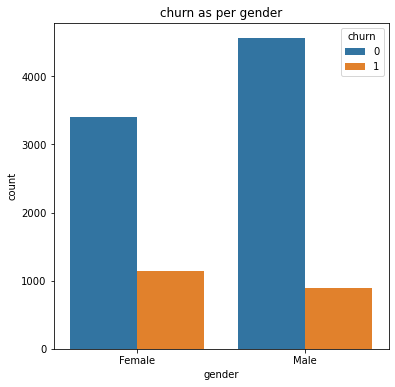

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(df.gender,hue= df.churn)
plt.title('churn as per gender')

Text(0.5, 1.0, 'churn vs active member')

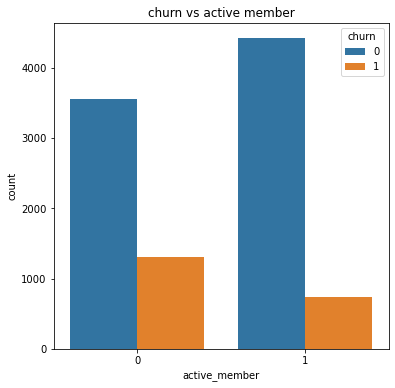

In [54]:
plt.figure(figsize=(6,6))
sns.countplot(df.active_member,hue= df.churn)
plt.title('churn vs active member')

Text(0.5, 1.0, 'churn vs tenure')

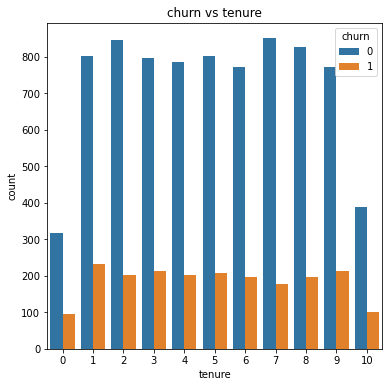

In [55]:
plt.figure(figsize=(6,6))
sns.countplot(df.tenure,hue= df.churn)
plt.title('churn vs tenure')

Text(0.5, 1.0, 'churn vs credit_card')

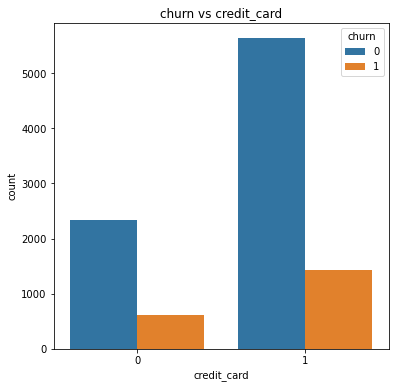

In [56]:
plt.figure(figsize=(6,6))
sns.countplot(df.credit_card,hue= df.churn)
plt.title('churn vs credit_card')

Text(0.5, 1.0, 'churn vs products number')

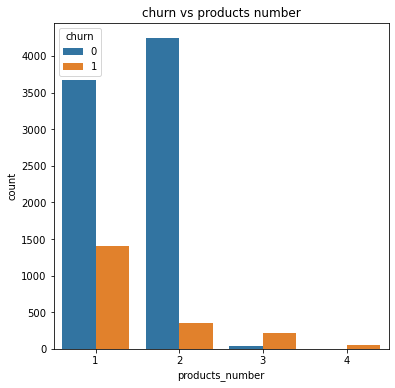

In [57]:
plt.figure(figsize=(6,6))
sns.countplot(df.products_number,hue= df.churn)
plt.title('churn vs products number')

Text(0.5, 1.0, 'Distribution of age vs churn')

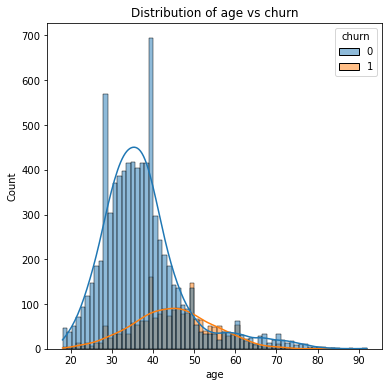

In [58]:
plt.figure(figsize=(6,6))
sns.histplot(data = df,x='age',hue='churn',kde=True)
plt.title('Distribution of age vs churn')

Text(0.5, 1.0, 'Distribution of credit score vs churn')

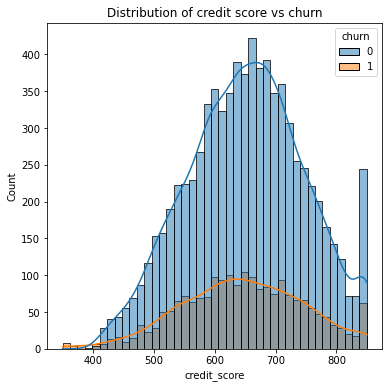

In [59]:
plt.figure(figsize=(6,6))
sns.histplot(data = df,x='credit_score',hue='churn',kde=True)
plt.title('Distribution of credit score vs churn')

Text(0.5, 1.0, 'Distribution of estimated_salary vs churn')

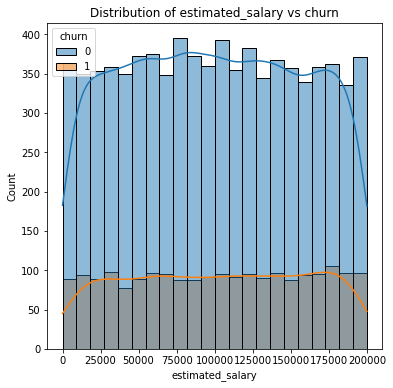

In [60]:
plt.figure(figsize=(6,6))
sns.histplot(data = df,x='estimated_salary',hue='churn',kde=True)
plt.title('Distribution of estimated_salary vs churn')

Text(0.5, 1.0, 'Distribution of balance vs churn')

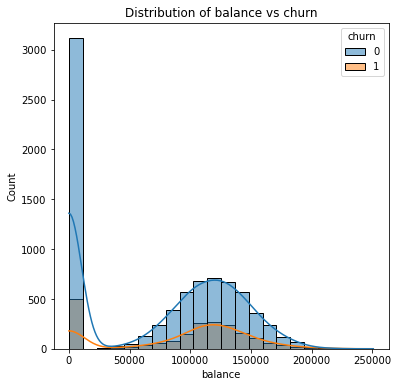

In [61]:
plt.figure(figsize=(6,6))
sns.histplot(data = df,x='balance',hue='churn',kde=True)
plt.title('Distribution of balance vs churn')

Text(0.5, 1.0, 'Correlation Matrix')

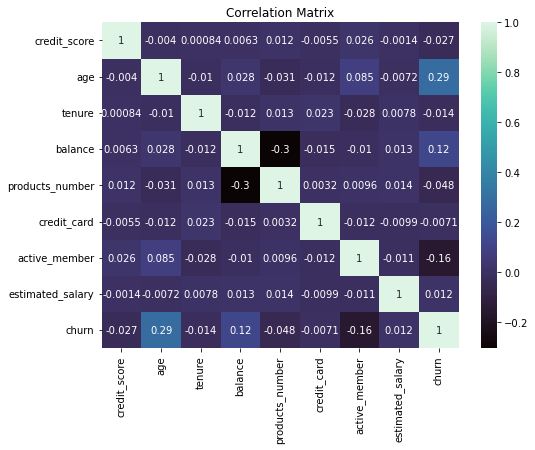

In [62]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap="mako")
plt.title('Correlation Matrix')

In [63]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [64]:
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [65]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [66]:
label_encoder = preprocessing.LabelEncoder()
x['gender'] = label_encoder.fit_transform(x['gender'])
x['country'] = label_encoder.fit_transform(x['country'])

Text(0.5, 1.0, 'Distribution of dependent variable')

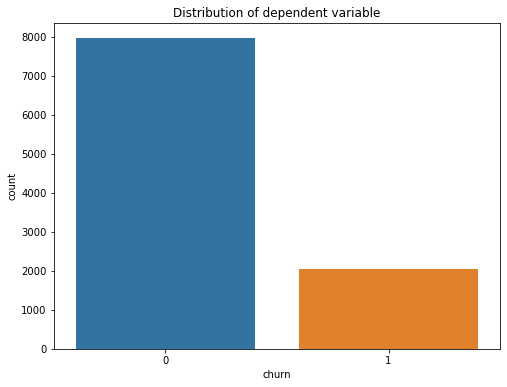

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(y)
plt.title('Distribution of dependent variable')

In [68]:
smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)

Text(0.5, 1.0, 'Distribution of dependent variable after oversampling')

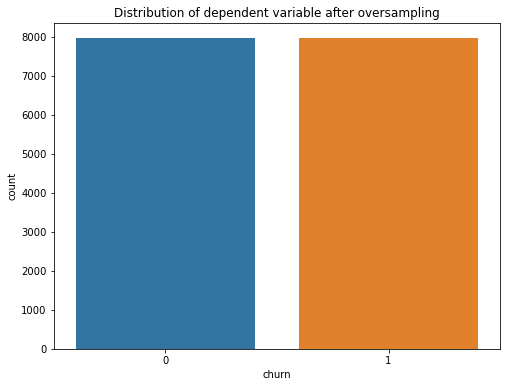

In [69]:
plt.figure(figsize=(8,6))
sns.countplot(y_sm)
plt.title('Distribution of dependent variable after oversampling')

In [70]:
### Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])

In [71]:
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(x_sm, y_sm)


In [72]:
x_train, x_test,y_train,y_test = train_test_split(x_lda,y_sm,test_size=0.25,random_state=40)

In [ ]:
## Hyperparameter Tuning

In [78]:
score = []
dt = RandomizedSearchCV(DecisionTreeClassifier(),{
    'criterion':['gini','entropy'],
    'max_depth' : [7,9,12,15,30],
    'min_samples_split': [2,4,6,8,10,15],
    'min_samples_leaf' : [1,2,3,5],
    'max_leaf_nodes' : [3,5,7,9],'max_features' : [1,2]
    
},cv = 10)
dt.fit(x_lda,y_sm)
score.append({
        'model': 'Decision Tree',
        'best_score': dt.best_score_,
        'best_params': dt.best_params_
    })
dfinal = pd.DataFrame(score,columns = ['model','best_score','best_params'])
dfinal
print(dfinal['best_params'][0])

{'min_samples_split': 6, 'min_samples_leaf': 3, 'max_leaf_nodes': 9, 'max_features': 1, 'max_depth': 7, 'criterion': 'entropy'}


In [79]:
score = []
xg = GridSearchCV(XGBClassifier(),{
 'n_estimators':[5,10,20],
            'learning_rate':[0.1,0.3,0.5],'max_depth':[5,10,20],'gamma':[0.12,0.3],'reg_lambda':[0.2,0.1,0.3]
    
},cv = 10)
xg.fit(x_lda,y_sm)
score.append({
        'model': 'XGBoost',
        'best_score': xg.best_score_,
        'best_params': xg.best_params_
    })
dfinal = pd.DataFrame(score,columns = ['model','best_score','best_params'])
dfinal
print(dfinal['best_params'][0])

{'gamma': 0.12, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10, 'reg_lambda': 0.1}


In [80]:
score = []
knn = GridSearchCV(KNeighborsClassifier(),{ 'n_neighbors':[3,7,11,5],
            'metric':['minkowski','euclidean']
    
},cv = 10)
knn.fit(x_lda,y_sm)
score.append({
        'model': 'KNN',
        'best_score': knn.best_score_,
        'best_params': knn.best_params_
    })
dfinal = pd.DataFrame(score,columns = ['model','best_score','best_params'])
dfinal
print(dfinal['best_params'][0])

{'metric': 'minkowski', 'n_neighbors': 11}


## Decision Tree Classifier

Accuracy:  0.7569060773480663
Classification report: 
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1955
           1       0.82      0.67      0.74      2027

    accuracy                           0.76      3982
   macro avg       0.77      0.76      0.76      3982
weighted avg       0.77      0.76      0.76      3982



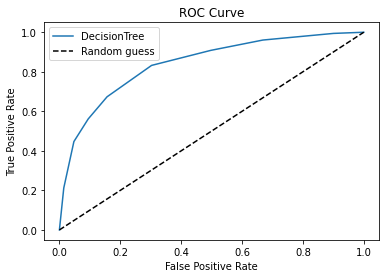

In [82]:
dt = DecisionTreeClassifier(min_samples_split= 6, min_samples_leaf= 3, max_leaf_nodes= 9, max_features= 1, max_depth= 7, criterion= 'entropy')
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification report: ")
print(classification_report(y_test, y_pred))
# Plot ROC curve
y_pred_proba = dt.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='DecisionTree')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## XGBClassifier

Accuracy:  0.7624309392265194
Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1955
           1       0.80      0.71      0.75      2027

    accuracy                           0.76      3982
   macro avg       0.77      0.76      0.76      3982
weighted avg       0.77      0.76      0.76      3982



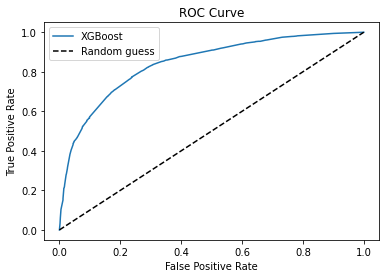

In [83]:
xg = XGBClassifier(gamma= 0.12, learning_rate =  0.1, max_depth= 5, n_estimators = 10, reg_lambda = 0.1)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification report: ")
print(classification_report(y_test, y_pred))
# Plot ROC curve
y_pred_proba = xg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## KNN

Accuracy:  0.7533902561526871
Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1955
           1       0.77      0.73      0.75      2027

    accuracy                           0.75      3982
   macro avg       0.75      0.75      0.75      3982
weighted avg       0.75      0.75      0.75      3982



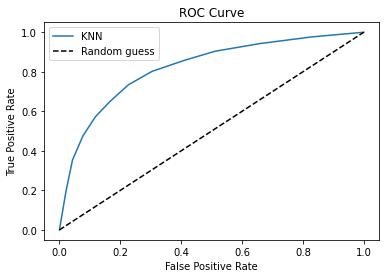

In [84]:
knn = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification report: ")
print(classification_report(y_test, y_pred))
# Plot ROC curve
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='KNN')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()